In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math

In [2]:
problem = tsplib95.load("a280.tsp")
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [3]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


151915.24539418315

In [4]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(22, 46), (46, 3), (3, 15), (15, 10), (10, 33), (33, 31), (31, 25), (25, 21), (21, 13), (13, 47), (47, 40), (40, 43), (43, 14), (14, 30), (30, 37), (37, 6), (6, 32), (32, 34), (34, 8), (8, 38), (38, 9), (9, 2), (2, 24), (24, 19), (19, 48), (48, 5), (5, 41), (41, 7), (7, 29), (29, 17), (17, 12), (12, 36), (36, 26), (26, 35), (35, 18), (18, 39), (39, 1), (1, 45), (45, 42), (42, 20), (20, 23), (23, 4), (4, 27), (27, 11), (11, 44), (44, 28), (28, 16), (16, 22)]


In [5]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

KeyError: 242

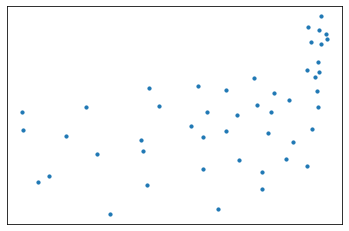

In [6]:
solution = tsplib95.load("a280.opt.tour").tours[0]
solution = get_edge_list(solution)
# nx.draw_networkx(G, with_labels=False, node_size=10, edgelist=[])
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=10, edgelist=solution)
print(get_fitness(solution))

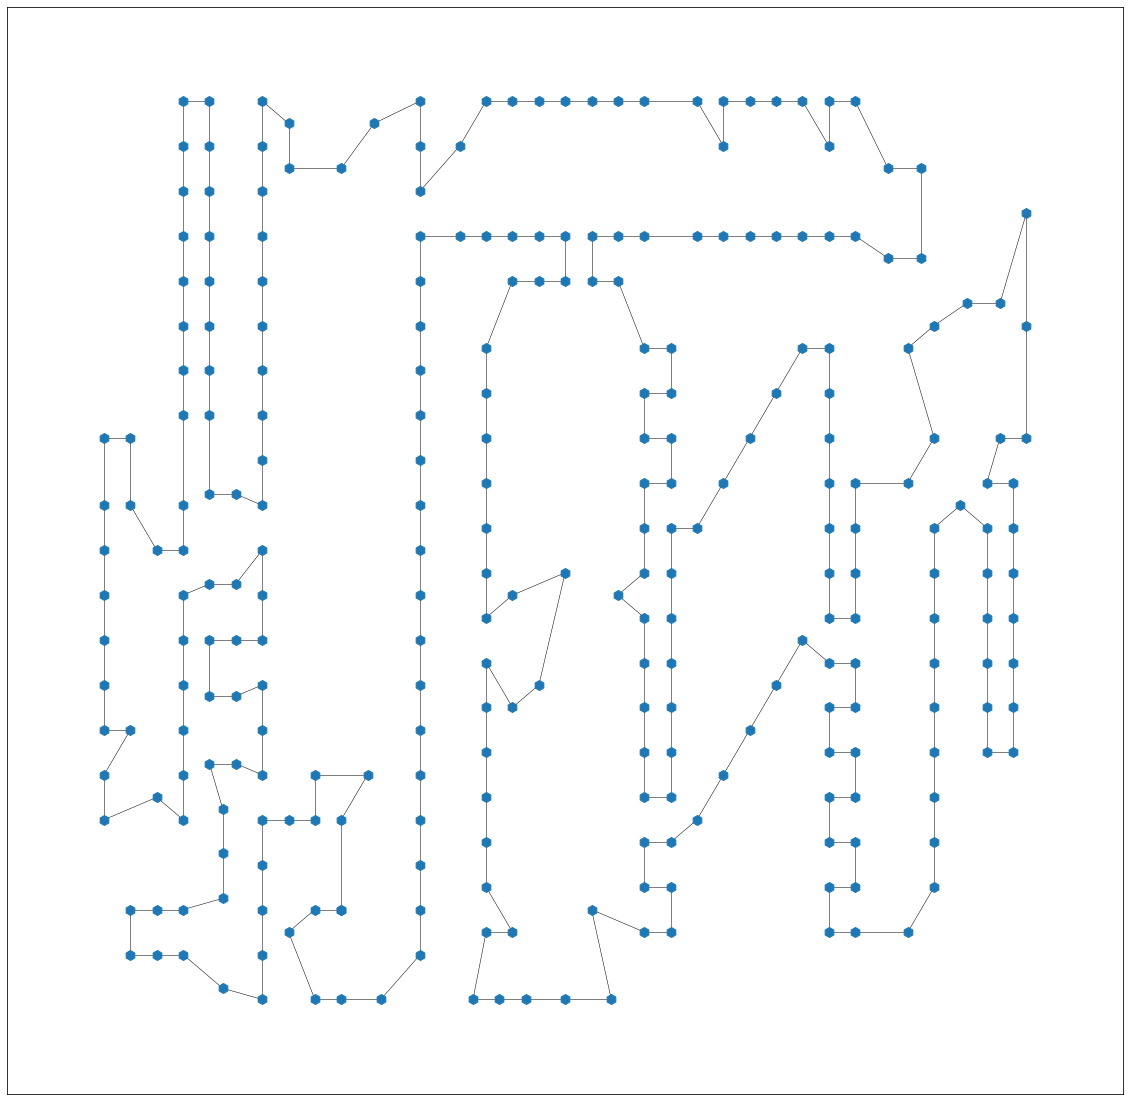

In [ ]:
fig, axs = plt.subplots(1, figsize=(20,20))
# nx.draw_networkx(G, pos=dictionary, with_labels=True, edgelist=solution, ax=axs)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs)
nx.draw_networkx_nodes(G, pos=dictionary, node_size=100,ax=axs)
